# Analysis fastReach 

## general prep

In [92]:

# load packages
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
# %load_ext rpy2.ipython # currently not needed
import glob



In [ ]:
# set path
d = "C://Users/terfu/Desktop/2021-fastReach/analyses/Leonie_tests/"

## load functions

In [71]:
# plot with two cats
def plot_2_cats(data, x, y, hue, ylabel, xlabel,cats,palette):
    
    cats_0 = data[data[x]==cats[0]]
    cats_1 = data[data[x]==cats[1]]

    pairs = [(cats[0], cats[1])]

    ###  get p values for paired t test between two conditions

    pvalues = [
        stats.ttest_rel( cats_0[y], cats_1[y]).pvalue
        #stats.ranksums(cat_0[dv], cat_1[dv]).pvalue
    ]
    
    # Transform each p-value to "p=" in scientific notation
    formatted_pvalues = [f'p={pvalue:.2e}' for pvalue in pvalues]

    with sns.plotting_context('paper', font_scale = 1.8):

        ### Create new plot
        fig, ax = plt.subplots(1, 1, figsize=(3,5))
        fig.patch.set_alpha(1)

        sns.despine() #bottom=True, left=True

        #  show lines connecting single observations    
        sns.lineplot(data = data, x = x, y = y, hue = data.pID, legend = False, palette = sns.color_palette(['grey'], len(data.pID.unique())), linewidth = 0.5, linestyle = '--', alpha = 0.5,ci =None)
        

        #Show each observation with a scatterplot
        sns.stripplot(data = data,x = x, y = y, hue = None,size=10, dodge=True, alpha=.5, label=None, jitter = 0.04,palette= palette)

        # show boxplots
        #sns.boxplot(data = data,x = x, y = y,  palette= palette)

        # show line connecting menas
        sns.pointplot(
            data = data,x = x, y = y, dodge=.8 - .8 / 3,
            markers="d", scale=.75, ci =None)


        # Add annotations
        annotator = Annotator(ax, pairs = [(cats[0], cats[1])], data = data,x = x, y = y)
        annotator.configure(text_format="simple")
        annotator.set_pvalues(pvalues)
        annotator.annotate()

        # Label and show
        # label_plot_for_subcats(ax)
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        ax.set_xlabel(xlabel)

        plt.show()

        fig.savefig('results/'+ title + '_' + ylabel + '_' + xlabel + '.png', format='png', transparent=False, bbox_inches='tight', dpi=300)
        fig.savefig('results/'+title + '_' + ylabel + '_' + xlabel + '.eps', format='eps', transparent=True, bbox_inches='tight', dpi=300)

In [ ]:
# plot with three

# 1. Intentional Binding
- input: 3 tabels for each pID: pID | stim_cond (basline vs. random vs. EEG)| temp_cond (200|350|500??) | IB_estimate

- think about defintion of IB_estimate
- linear-mixed-model mit  IB_estimate ~ stim_cond * temp_cond + (1|pID)
- liklyhood ratio test to check for significant influences
- if the case: post-hoc test = read up which ones
- Visualization: Boxpolts with 3 boxes (stim_conditions), or 9 boxes (both, x = temp_condition) --> depending on significance of temp_condition
- connect means, show points for participands
- maybe grey out basline (since not analyzed in the other data)

In [117]:
# merge data
filenames = glob.glob(d + 'fake_data/ib_estimate' + "/*.csv")

data_list =[]
for filename in filenames:
    data = pd.read_csv(filename, index_col=None, header=0, sep = ";")
    data_list.append(data)

ib = pd.concat(data_list, axis=0, ignore_index=True)


# 2. Questionaire results
- items per block "„Während der Aufgabe hat es sich angefühlt, als hätte ich die Kontrolle über die Bewegungen.“
- input pid|first_block|control_random|control_EEG|expectation_fit|embodiment
- paired t-testsf
- box plots
- SD,M,effect size

@ Lukas? Significance test mit 5 values ist wirklich etwas shady, oder?

In [53]:
#propably makes sense to integrate all subjective data
# load  / merge qustionaire data
questionaire_fname = d + 'fake_data/subjective_fastReach.csv'
questionaire= pd.read_csv(questionaire_fname, sep = ';')

### plot control

control_EEG vs. control_random: Custom statistical test, P_val:1.923e-01


c:\Users\terfu\AppData\Local\Programs\Python\Python310\lib\site-packages\statannotations\_Plotter.py:337: UserWarning: Invalid x-position found. Are the same parameters passed to seaborn and statannotations calls? or are there few data points?
  warnings.warn(


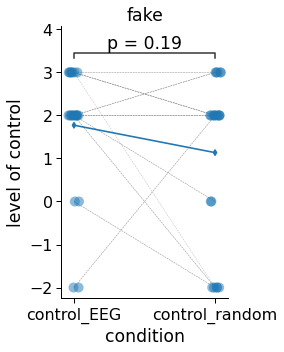

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [72]:
questionaire_long = questionaire.melt(id_vars= ['pID'],value_vars=['control_EEG','control_random'])

palette = sns.color_palette(palette=None, n_colors=1)
cats= ['control_random', 'control_EEG']
ylabel = 'level of control'
xlabel = 'condition'
title = 'fake'
data = questionaire_long
y = "value"
x = "variable"
hue = "pID"

plot_2_cats(data, x, y, hue, ylabel, xlabel,cats,palette)

#cohend(data,x,y, cats)

### numbers control

In [82]:
questionaire_long.groupby('variable')['value'].agg(["mean", "std"])


,mean,std
variable,,
control_EEG,1.772727,1.477830
control_random,1.136364,1.909761


### count expectation

In [89]:
questionaire['expectation_fit'].value_counts()

eeg       13
random     9
Name: expectation_fit, dtype: int64

### count embodiment

In [90]:
questionaire['embodiment'].value_counts()

nein    11
ja      11
Name: embodiment, dtype: int64

# 3. Content Analysis
- built to world clouds for each block
- define stopwords
- maybe check sentiment analysis -> pareid t-test?


In [ ]:
# load data (see test script)
